***

Profesor: Gonzalo A. Ruz, PhD

Curso: Aprendizaje Automático

***



### Ejemplo de la clase EM

* Sesgo incial moneda A = 0.6, y de la moneda B = 0.5
* Asumimos que la probabilidad de obtener k caras en n lanzamientos viene dado por una distribucion binomial.
* El primer experimento obtuvo 5 caras de 10 lanzamientos
* Usamos Bayes para calcular la probabilidad de que el lanzamiento fue usando la moneda A

In [1]:
from scipy.stats import binom

PrA=(0.5*binom.pmf(5, 10, 0.6))/((0.5*binom.pmf(5, 10, 0.6))+(0.5*binom.pmf(5, 10, 0.5)))
print (PrA)

0.4491489261009363


* Usamos Bayes para calcular la probabilidad de que el lanzamiento fue usando la moneda B.
* En verdad, dado que solo hay dos monedas el resultado es 1-PrA

In [2]:
PrB=(0.5*binom.pmf(5, 10, 0.5))/((0.5*binom.pmf(5, 10, 0.5))+(0.5*binom.pmf(5, 10, 0.6)))
print(PrB)

0.5508510738990637


#### Load the CallCenterData dataset

In [4]:
import pandas as pd
data = pd.read_csv('dataset/CallCenterData.csv')

#### Summary with descriptive statistics

In [5]:
data.describe(include='all')

,ID,Edad,Sexo,NivelEducacion,EstadoCivil,NivelSocEco,HorasLogeadas,HorasHabladas,ContactosEfectivosPromedio,RegistrosTerminados,ProdMayorUbral
count,660.00,660.000000,660,660,660,660,660.000000,660.000000,660.000000,660.000000,660
unique,NaN,NaN,2,4,2,5,NaN,NaN,NaN,NaN,2
top,NaN,NaN,f,em,s,c3c4,NaN,NaN,NaN,NaN,no
freq,NaN,NaN,340,345,489,386,NaN,NaN,NaN,NaN,351
mean,330.50,32.034848,NaN,NaN,NaN,NaN,117.025260,41.113746,192.477960,467.773235,NaN
...,...,...,...,...,...,...,...,...,...,...,...
min,1.00,19.000000,NaN,NaN,NaN,NaN,0.170000,0.013333,0.000000,0.000000,NaN
25%,165.75,26.000000,NaN,NaN,NaN,NaN,79.197125,21.767312,84.625000,231.107143,NaN
50%,330.50,29.500000,NaN,NaN,NaN,NaN,122.679417,37.665000,181.000000,440.500000,NaN
75%,495.25,36.000000,NaN,NaN,NaN,NaN,160.650250,57.709000,270.558333,645.812500,NaN


#### We are going to use only continuous attributes

In [6]:
X=data[['Edad','HorasLogeadas','HorasHabladas','ContactosEfectivosPromedio','RegistrosTerminados']]
X.head(5)

,Edad,HorasLogeadas,HorasHabladas,ContactosEfectivosPromedio,RegistrosTerminados
0,32,151.1525,45.8525,192.25,591.75
1,24,71.1800,24.7600,1.00,501.00
2,29,120.5600,49.4500,156.00,993.00
3,48,90.8500,28.8500,442.00,569.00
4,25,190.1800,41.1600,0.00,0.00


#### Since the attributes are on different scales, it is convenient to standardize 

In [7]:
from sklearn.preprocessing import StandardScaler
# Standardize the data so that they have mean 0 and variance 1
X_std = pd.DataFrame(StandardScaler().fit_transform(X),columns=X.columns)

#shows the first 5 rows of the table
X_std.head(5)

,Edad,HorasLogeadas,HorasHabladas,ContactosEfectivosPromedio,RegistrosTerminados
0,-0.003888,0.640191,0.187366,-0.001555,0.396565
1,-0.896405,-0.860009,-0.646611,-1.306124,0.106283
2,-0.338582,0.066308,0.329608,-0.248826,1.680045
3,1.781147,-0.491020,-0.484897,1.702059,0.323794
4,-0.784841,1.372306,0.001829,-1.312945,-1.496268


# EM algorithm

#### Lets consider 2 components

In [8]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(2, 
                     covariance_type='full', 
                     random_state=0).fit(X_std)

In [9]:
gmm.means_

array([[ 0.34180319,  0.68375345,  0.7016693 ,  0.51484616,  0.68943156],
       [-0.31041175, -0.62095706, -0.63722752, -0.46756234, -0.62611369]])

In [10]:
labels = gmm.predict(X_std)
print(labels)

[1 0 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1
 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0
 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0
 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 1 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1
 1 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0
 0 0 1 1 0 1 0 0 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 1 0 0 0 1 1 0 

#### Let's visualize using PCA





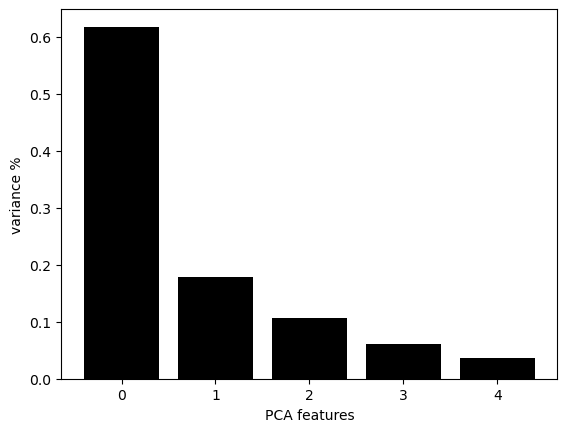

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Create a PCA instance: pca
pca = PCA()
principalComponents = pca.fit_transform(X_std)

# Plot the percentage of the variance that is explained by each component
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

# Save the components in a dataframe
PCA_components = pd.DataFrame(principalComponents)

#### We will use the two main components to project our data from 5D to 2D and color according to the cluster label

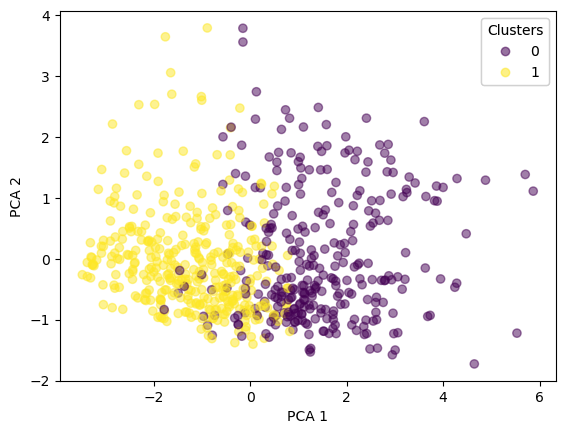

In [12]:
fig, ax = plt.subplots()
scatter = ax.scatter(PCA_components[0], PCA_components[1], alpha=.5, 
            c=labels)

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
ax.add_artist(legend1)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


#### Once you have the labels, you can proceed just as before to characterize each cluster.

In [13]:
gmm.aic(X_std)

7206.928974240056

In [14]:
gmm.bic(X_std)

7391.110807475895

# Identifying the number of clusters in the Data by Model Comparison

In [15]:
import numpy as np
n_components = np.arange(1, 21)
models = [GaussianMixture(n, 
                          covariance_type='full', random_state=0).fit(X_std) for n in n_components]

In [16]:
models[0:5]

[GaussianMixture(random_state=0),
 GaussianMixture(n_components=2, random_state=0),
 GaussianMixture(n_components=3, random_state=0),
 GaussianMixture(n_components=4, random_state=0),
 GaussianMixture(n_components=5, random_state=0)]

In [17]:
models[0].bic(X_std)

7837.863954726919

In [18]:
models[0].aic(X_std)

7748.019158026509

In [19]:
gmm_model_comparisons=pd.DataFrame({"n_components" : n_components,
                                  "BIC" : [m.bic(X_std) for m in models],
                                   "AIC" : [m.aic(X_std) for m in models]})


In [20]:
gmm_model_comparisons.head()

,n_components,BIC,AIC
0,1,7837.863955,7748.019158
1,2,7391.110807,7206.928974
2,3,7231.765371,6953.246502
3,4,7153.299676,6780.443770
4,5,7226.652162,6759.459219


Text(0, 0.5, 'Score')

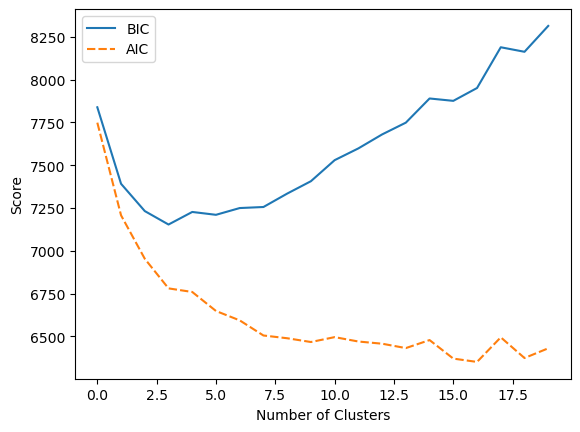

In [21]:
import seaborn as sns
sns.lineplot(data=gmm_model_comparisons[["BIC","AIC"]])
plt.xlabel("Number of Clusters")
plt.ylabel("Score")

In [22]:
n=4
gmm = GaussianMixture(n, covariance_type='full', random_state=0).fit(X_std)
labels = gmm.predict(X_std)

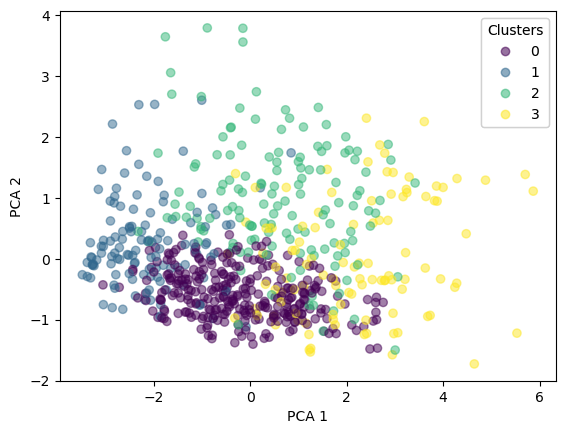

In [23]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
scatter = ax.scatter(PCA_components[0], PCA_components[1], alpha=.5, 
            c=labels)

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
ax.add_artist(legend1)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()
